# Linear Regression
----------------------------


In [210]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

### Toy problem/data

In [348]:
#Toy 1D data set:
#Sinusoidal:
x_toy = np.linspace(-3,3,500)
y_sin = np.sin(x_toy)*0.5 +5 + np.random.normal(size = 500)*0.1 #Adding noise to the toy problem
#Linear:
y_lin = 2*x_toy + 5 + np.random.normal(size = 500)*0.1 #Adding noise to the toy problem

In [349]:
#Linear:
x_Toy, x_Toy_test, y_Toy, y_Toy_test = train_test_split(x_toy, y_lin, test_size=0.20, random_state=101)

#Sinusoidal:
xsin_Toy, xsin_Toy_test, ysin_Toy, ysin_Toy_test = train_test_split(x_toy, y_sin, test_size=0.20, random_state=101)

### Sarcos Data

In [350]:
sarcos = pd.read_csv('sarcos_inv.csv', header = None).values

In [351]:
xt_, xtst_, yt, ytst = train_test_split(sarcos[:,:-1], sarcos[:,-1], train_size=0.9, random_state=101)

In [352]:
xtst_ = xtst_[:50]
ytst = ytst[:50]

Here we standardize the x-values using the mean and unit standard deviation for each feature in the training data_set.

In [353]:
scaler = preprocessing.StandardScaler().fit(xt_)
xt, xtst = scaler.transform(xt_), scaler.transform(xtst_)

# Linear regression model (using closed form solution)

Here we build the MSE and LinearRegression classes. The Linear Regression is trained using the closed form solution:

$$ \hat{\beta} = (X^{T}X)^{-1}X^{T}y $$

In [354]:
def mse(Prediction, Y):
    MSE = np.mean(np.square(Prediction - Y))
    return MSE

In [355]:
class LinearRegression():
    
    def __init__(self, intercept = True):
        self.intercept = intercept
    
    def fit(self, X, Y):
        if self.intercept == True:
            if len(X.shape) == 1:
                X = X.reshape(-1,1)
                X = np.insert(X,0,1,1)
                w = (np.linalg.inv(X.T @ X)) @ X.T @ Y

                self.B = w[1:]
                self.c = w[0]
                
            else:
                X = np.insert(X,0,1,1)
                w = np.linalg.inv(X.T @ X) @ X.T @ Y

                self.B = w[1:]
                self.c = w[0]
        else:
            w = np.linalg.inv(X.T @ X) @ X.T @ Y
            self.B = w
            self.c = 0
        return self
            
    def predict(self, X_t):
        if len(X_t.shape) == 1:
            X_t = X_t.reshape(-1,1)
            Prediction = X_t @ self.B + self.c
        else:
            Prediction = X_t @ self.B + self.c
        
        return Prediction

## Sarcos LR

In [356]:
model = LinearRegression()
model.fit(xt,yt)
prediction = model.predict(xtst)

In [357]:
mse(prediction,ytst)

16.766759879376508

## Toy Problem LR
Linear

In [358]:
model_toy_lin = LinearRegression()
model_toy_lin.fit(x_Toy,y_Toy)
prediction_toy_lin = model_toy_lin.predict(x_Toy_test)

In [359]:
mse(prediction_toy_lin, y_Toy_test)

0.01083862112012038

Sinusoidal

In [360]:
model_toy_sin = LinearRegression()
model_toy_sin.fit(xsin_Toy,ysin_Toy)
prediction_toy_sin = model_toy_sin.predict(xsin_Toy_test)

In [361]:
mse(prediction_toy_sin, ysin_Toy_test)

0.05143469792459664

## Plots for Toy Problem

#### Linear (with noise)

In [362]:
x_Toy_test_ = x_Toy_test[np.argsort(x_Toy_test)]
prediction_toy_lin_ = prediction_toy_lin[np.argsort(x_Toy_test)]
y_Toy_test_ = y_Toy_test[np.argsort(x_Toy_test)]

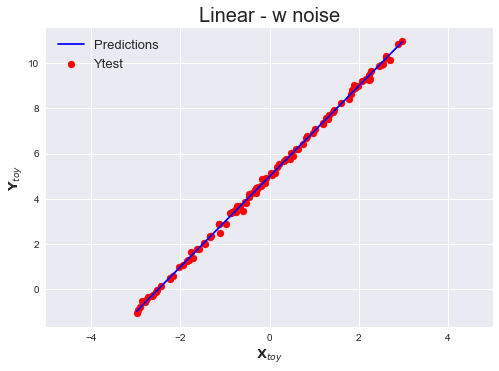

In [363]:
plt.style.use('seaborn')
plt.plot(x_Toy_test_, prediction_toy_lin_, color = 'b', label='Predictions')
plt.scatter(x_Toy_test_, y_Toy_test_, color = 'r', label='Ytest')
plt.legend(prop={'size': 13})
plt.title('Linear - w noise', fontsize=20)
plt.xlim(-5,5)

plt.xlabel('$\mathbf{X}_{toy}$', size = 13)
plt.ylabel('$\mathbf{Y}_{toy}$', size = 13)


plt.show()

#### Sinusoidal (with noise)

In [364]:
xsin_Toy_test_ = x_Toy_test[np.argsort(xsin_Toy_test)]
prediction_toy_sin_ = prediction_toy_sin[np.argsort(xsin_Toy_test)]
ysin_Toy_test_ = ysin_Toy_test[np.argsort(xsin_Toy_test)]

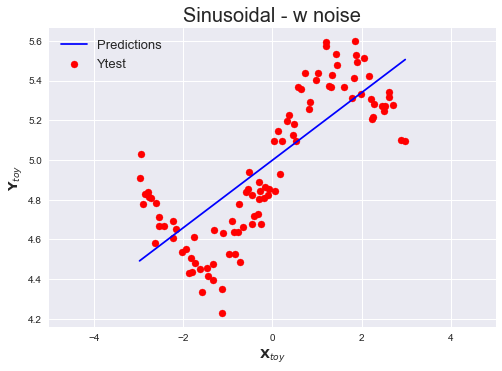

In [365]:
plt.style.use('seaborn')
plt.plot(xsin_Toy_test_, prediction_toy_sin_, color = 'b', label='Predictions')
plt.scatter(xsin_Toy_test_, ysin_Toy_test_, color = 'r', label='Ytest')
plt.legend(prop={'size': 13})
plt.title('Sinusoidal - w noise', fontsize=20)
plt.xlim(-5,5)

plt.xlabel('$\mathbf{X}_{toy}$', size = 13)
plt.ylabel('$\mathbf{Y}_{toy}$', size = 13)

plt.show()